In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

data_path = os.getcwd() + '/dados' # precisa limpar o cabecalho desses arquivos

from ES3 import * 
os.listdir(data_path)[2]

'SIMCOSTA_RJ-4_OCEAN_2017-08-28_2022-01-25.csv'

In [2]:
dado = trata_dado(data_path + '/' + os.listdir(data_path)[2])

In [3]:
dado = dado[:'2021-12-31']

In [4]:
dado_repetido(dado, 'Hsig', 4)

[(Timestamp('2017-08-28 17:25:00'), Timestamp('2017-08-29 19:55:00')),
 (Timestamp('2017-08-30 00:55:00'), Timestamp('2017-08-31 00:55:00')),
 (Timestamp('2017-08-31 02:55:00'), Timestamp('2017-08-31 14:55:00')),
 (Timestamp('2017-08-31 18:25:00'), Timestamp('2017-09-06 14:55:00')),
 (Timestamp('2017-09-06 16:55:00'), Timestamp('2017-09-07 09:25:00')),
 (Timestamp('2017-09-07 10:25:00'), Timestamp('2017-09-11 09:25:00')),
 (Timestamp('2017-09-12 02:25:00'), Timestamp('2017-09-13 02:55:00')),
 (Timestamp('2017-09-14 06:55:00'), Timestamp('2017-09-15 09:55:00')),
 (Timestamp('2017-09-15 18:55:00'), Timestamp('2017-09-17 12:25:00')),
 (Timestamp('2017-09-17 15:55:00'), Timestamp('2017-09-18 10:55:00')),
 (Timestamp('2017-09-18 15:55:00'), Timestamp('2017-09-22 04:55:00')),
 (Timestamp('2017-09-22 06:55:00'), Timestamp('2017-09-23 05:25:00')),
 (Timestamp('2017-09-24 13:55:00'), Timestamp('2017-09-25 22:55:00')),
 (Timestamp('2017-09-26 03:55:00'), Timestamp('2017-09-27 04:55:00')),
 (Time

In [5]:
dado_repetido(dado, 'Avg_Wv_Dir', 4)

[(Timestamp('2017-08-28 15:25:00'), Timestamp('2017-08-29 17:25:00')),
 (Timestamp('2017-08-29 19:55:00'), Timestamp('2017-08-30 09:25:00'))]

In [6]:
dado

,Hsig,TP,Avg_Wv_Dir,Avg_Wv_Dir_N,M_Decl
DATA,,,,,
2017-08-28 13:25:00,0.94,8.7,162.0,139.26,-22.74
2017-08-28 13:55:00,0.96,6.5,163.0,140.26,-22.74
2017-08-28 14:55:00,0.89,6.1,161.0,138.26,-22.74
2017-08-28 15:25:00,0.90,10.0,161.0,138.26,-22.74
2017-08-28 15:55:00,0.91,9.1,164.0,141.26,-22.74
...,...,...,...,...,...
2021-12-31 19:21:40,0.58,5.6,170.0,147.05,-22.95
2021-12-31 20:21:40,0.63,6.1,175.0,152.05,-22.95
2021-12-31 21:21:40,0.66,3.9,168.0,145.05,-22.95


In [7]:
teste_serie_temporal(dado)

Foram encontradas 55637 falhas na serie temporal.


[(Timestamp('2019-12-31 23:25:00'), Timestamp('2020-01-10 00:25:00')),
 (Timestamp('2020-09-14 07:55:00'), Timestamp('2020-10-29 14:25:00')),
 (Timestamp('2020-12-21 15:55:00'), Timestamp('2021-05-05 11:51:40'))]

In [8]:
evento_extremo(dado)

In [9]:
aproveitamento(dado, 'Hsig')

De 53321 valores, 170 foram marcados com a flag de pulo (0.32%).
4 valores foram marcados com a flag de crise (0.01%).


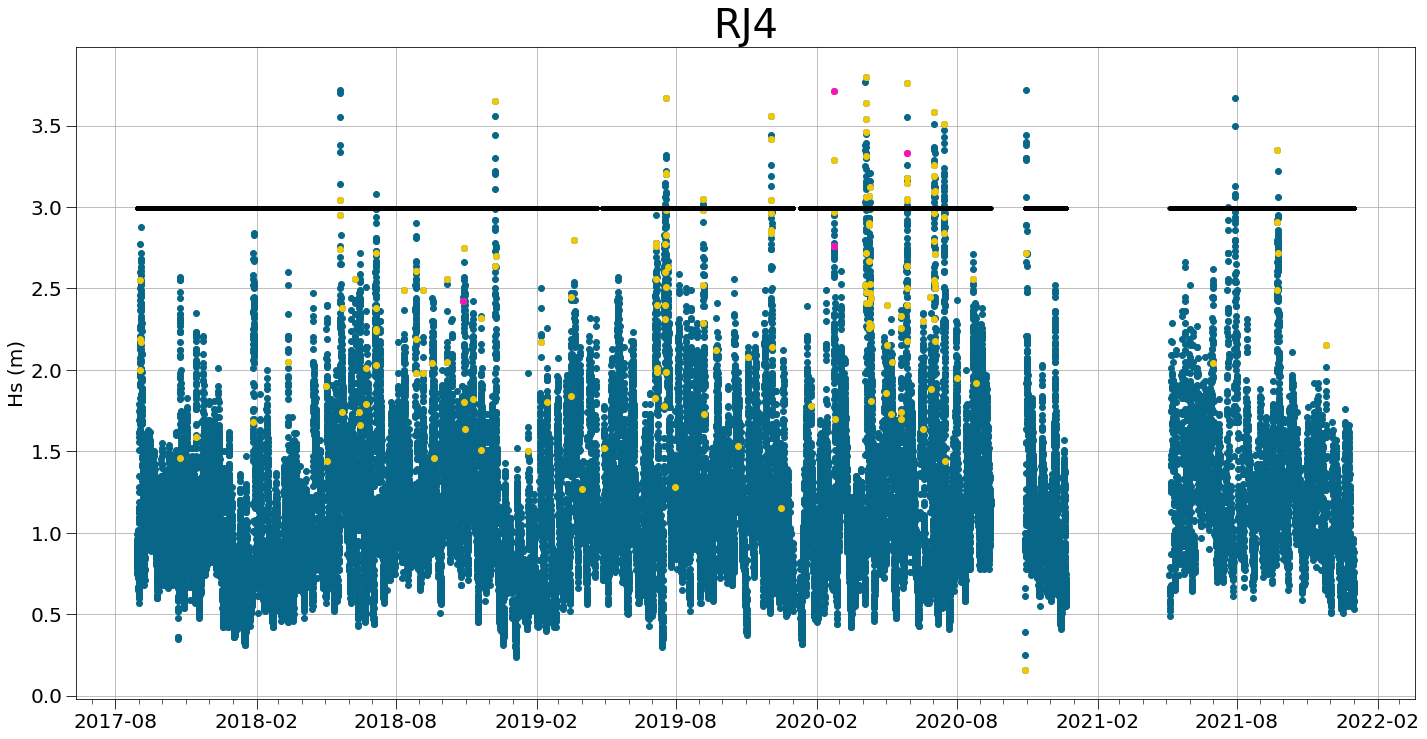

In [10]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(dado['Hsig'][:], marker = 'o', color = '#086788', linestyle = 'none')
ax.plot(dado['jump_flag'][:], marker = 'o', color = '#F0C808', linestyle = 'none')
ax.plot(dado['jump_crisis'][:], marker = 'o', color = '#FC0FC0', linestyle = 'none')
# ax.plot(serie4['Hsig'][:], marker = 'o', color = 'purple', linestyle = 'none')


ax.plot(dado['EE_Hsig'][:], marker = '.', color = 'black', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

# ax.set_ylim(0,5)
# ax.set_xlim(datetime(2020,5,1), datetime(2020,8,1))



###########################################################################

plt.title('RJ4', fontsize = 40)

plt.savefig(os.getcwd() +'/fig/RJ4')

In [11]:
# estudo pra justificar a escolha da serie da reanalise:

In [12]:
dado[dado[datetime(2020,5,1):datetime(2020,8,1)] > 2.988871].count()

Hsig              58
TP              4171
Avg_Wv_Dir      4171
Avg_Wv_Dir_N    4171
M_Decl             0
EE_Hsig         4176
jump_flag         12
jump_crisis        1
dtype: int64

In [13]:
dado[dado[datetime(2020,5,1):datetime(2020,8,1)] > 2].count()

Hsig             357
TP              4171
Avg_Wv_Dir      4171
Avg_Wv_Dir_N    4171
M_Decl             0
EE_Hsig         4176
jump_flag         33
jump_crisis        1
dtype: int64

In [14]:
dado[dado[datetime(2020,2,1):datetime(2020,5,1)] > 2.988871].count()

Hsig              39
TP              4021
Avg_Wv_Dir      4021
Avg_Wv_Dir_N    4021
M_Decl             0
EE_Hsig         4021
jump_flag         10
jump_crisis        1
dtype: int64

In [15]:
dado[dado[datetime(2020,2,1):datetime(2020,5,1)] > 2].count()

Hsig             295
TP              4021
Avg_Wv_Dir      4021
Avg_Wv_Dir_N    4021
M_Decl             0
EE_Hsig         4021
jump_flag         26
jump_crisis        2
dtype: int64

In [16]:
################################################

In [17]:
datas = teste_serie_temporal(dado)


Foram encontradas 55637 falhas na serie temporal.


In [18]:
serie1, serie2, serie3, serie4 = recorta_serie_temporal(teste_serie_temporal(dado), dado)

Foram encontradas 55637 falhas na serie temporal.


In [19]:
media = serie1.mean()
desvpad = serie1.std()
evento_extremo = media + 4*desvpad

evento_extremo_line = np.zeros(len(serie1))
for i in range(len(evento_extremo_line)):
        evento_extremo_line[i] = evento_extremo['Hsig']
        
serie1['EE'] = evento_extremo_line

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [20]:
media = serie2.mean()
desvpad = serie2.std()
evento_extremo = media + 4*desvpad

evento_extremo_line = np.zeros(len(serie2)) # como eu cheguei nesse valor?
for i in range(len(evento_extremo_line)):
        evento_extremo_line[i] = evento_extremo['Hsig']
        
serie2['EE'] = evento_extremo_line

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [21]:
media = serie3.mean()
desvpad = serie3.std()
evento_extremo = media + 4*desvpad

evento_extremo_line = np.zeros(len(serie3)) # como eu cheguei nesse valor?
for i in range(len(evento_extremo_line)):
        evento_extremo_line[i] = evento_extremo['Hsig']
        
serie3['EE'] = evento_extremo_line

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [22]:
media = serie4.mean()
desvpad = serie4.std()
evento_extremo = media + 4*desvpad

evento_extremo_line = np.zeros(len(serie4)) # como eu cheguei nesse valor?
for i in range(len(evento_extremo_line)):
        evento_extremo_line[i] = evento_extremo['Hsig']
        
serie4['EE'] = evento_extremo_line

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


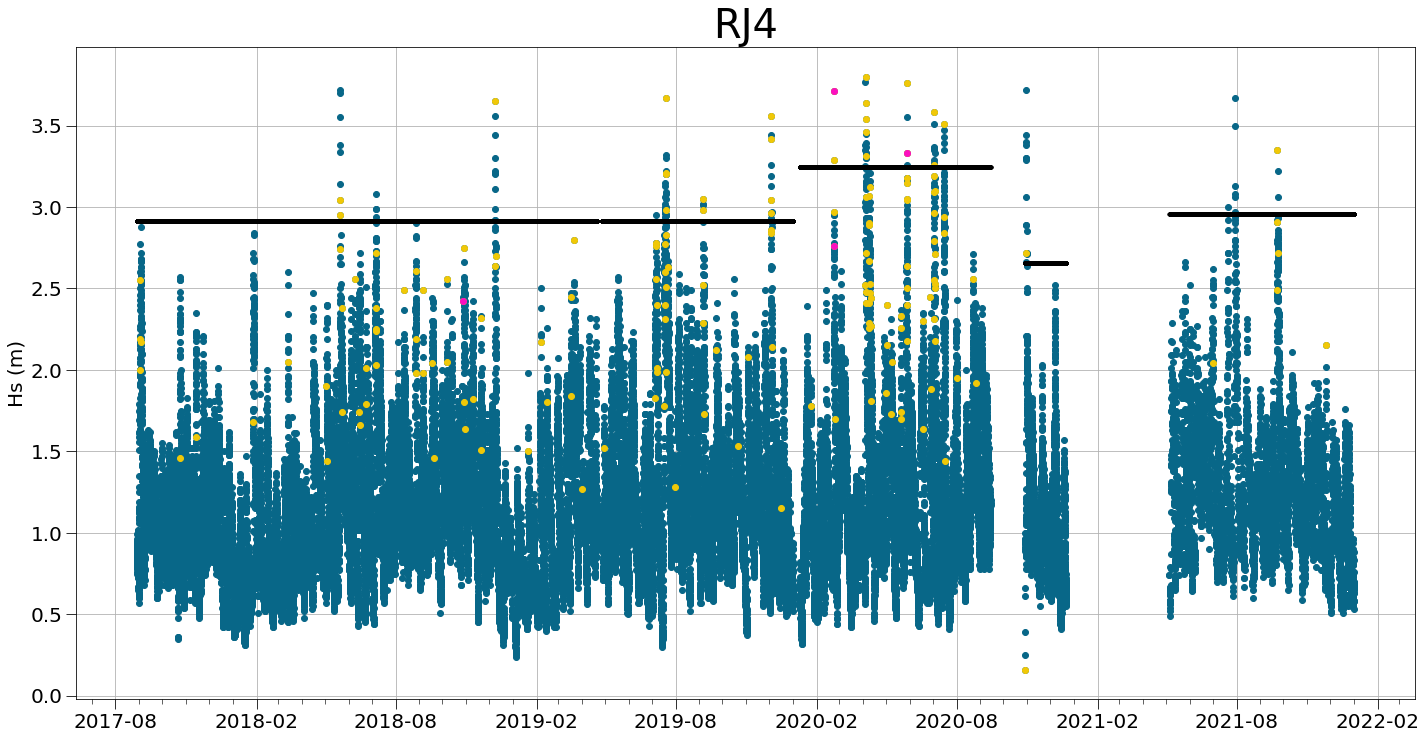

In [23]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)


ax.plot(dado['Hsig'][:], marker = 'o', color = '#086788', linestyle = 'none')
ax.plot(dado['jump_flag'][:], marker = 'o', color = '#F0C808', linestyle = 'none')
ax.plot(dado['jump_crisis'][:], marker = 'o', color = '#FC0FC0', linestyle = 'none')


ax.plot(serie1['EE'][:], marker = '.', color = 'black', linestyle = 'none')
ax.plot(serie2['EE'][:], marker = '.', color = 'black', linestyle = 'none')
ax.plot(serie3['EE'][:], marker = '.', color = 'black', linestyle = 'none')
ax.plot(serie4['EE'][:], marker = '.', color = 'black', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

# ax.set_xlim(datetime(2016,5,1), datetime(2021,10,1))



###########################################################################

plt.title('RJ4', fontsize = 40)

plt.savefig(os.getcwd() +'/fig/RJ4_series_separadas')

In [24]:
from windrose import WindroseAxes

In [25]:
dado_limpo = dado[dado['jump_flag'].isnull()]

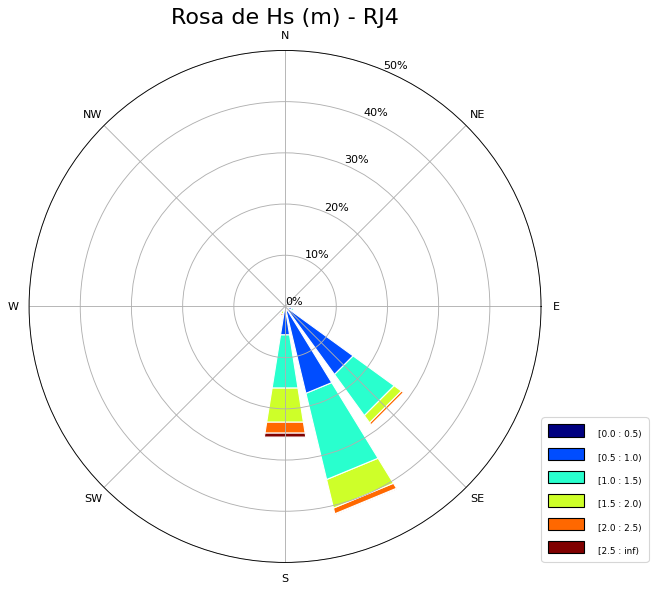

In [26]:
ws = dado_limpo['Hsig']
wd = dado_limpo['Avg_Wv_Dir_N']

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,3,0.5))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_title('Rosa de Hs (m) - RJ4', fontsize=20)
ax.set_yticklabels(y_ticks)
    
    
    
ax.set_legend(loc=[1,0], prop={'size': 16})

plt.savefig(os.getcwd() +'/fig/RJ4_rosaHs', bbox_inches='tight')

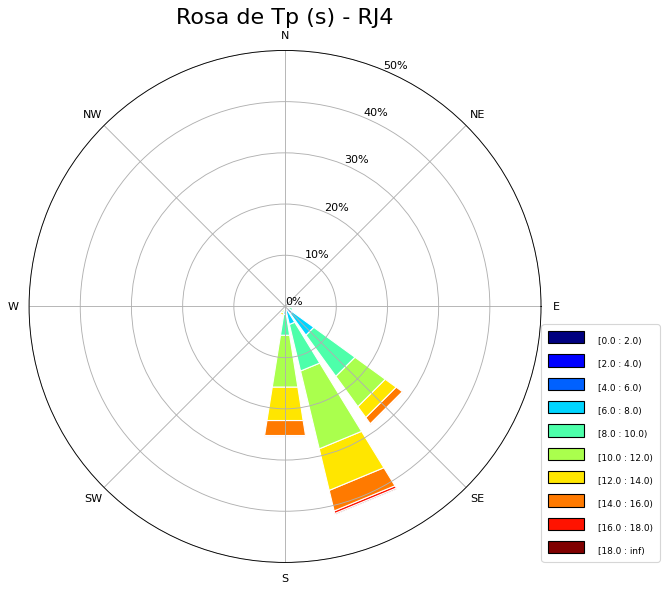

In [27]:
ws = dado_limpo['TP']


ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
# ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
    
ax.set_title('Rosa de Tp (s) - RJ4', fontsize=20)
ax.set_yticklabels(y_ticks)
    
    
    
ax.set_legend(loc=[1,0], prop={'size': 16})

plt.savefig(os.getcwd() +'/fig/RJ4_rosaTp', bbox_inches='tight')

In [28]:
# pra compara com a reanalise

In [29]:
compara_reanalise = dado[datetime(2020,5,1):datetime(2020,9,1)]

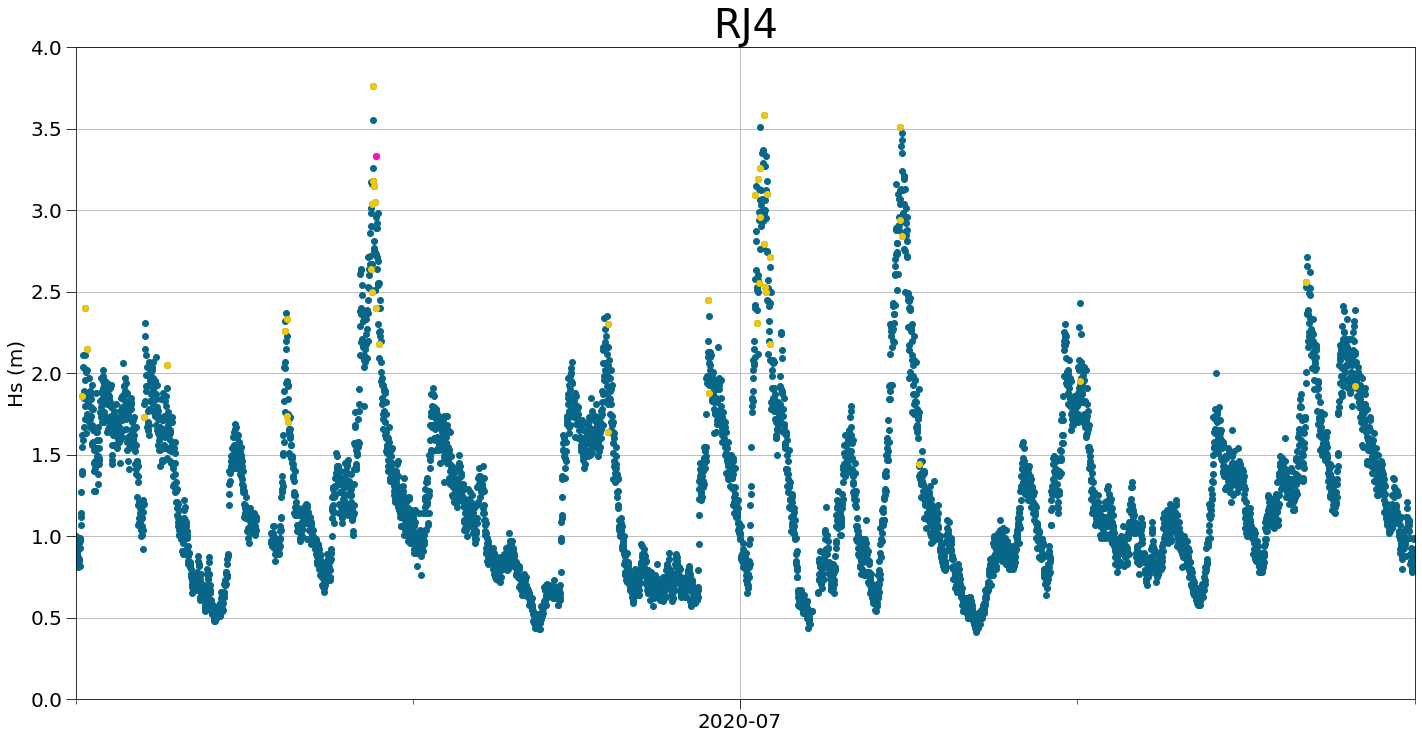

In [30]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)


ax.plot(compara_reanalise['Hsig'][:], marker = 'o', color = '#086788', linestyle = 'none')
ax.plot(compara_reanalise['jump_flag'][:], marker = 'o', color = '#F0C808', linestyle = 'none')
ax.plot(compara_reanalise['jump_crisis'][:], marker = 'o', color = '#FC0FC0', linestyle = 'none')


# ax.plot(serie1['EE'][:], marker = '.', color = 'black', linestyle = 'none')
# ax.plot(serie2['EE'][:], marker = '.', color = 'black', linestyle = 'none')
# ax.plot(serie3['EE'][:], marker = '.', color = 'black', linestyle = 'none')
# ax.plot(serie4['EE'][:], marker = '.', color = 'black', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_ylim(0, 4)
ax.set_xlim(datetime(2020,5,1), datetime(2020,9,1))


###########################################################################

plt.title('RJ4', fontsize = 40)

plt.savefig(os.getcwd() +'/fig/RJ4_compara_reanalise')

In [31]:
compara_reanalise_limpo = compara_reanalise[compara_reanalise['jump_flag'].isnull()]

In [32]:
ws = compara_reanalise_limpo['Hsig']
wd = compara_reanalise_limpo['Avg_Wv_Dir_N']

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,3,0.5))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])


ax.set_title('Rosa de Hs - RJ4', fontsize=20)

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
# ax.set_yticklabels(y_ticks)
# ax.set_legend(loc =(-0.1,0))

# plt.savefig(os.getcwd() +'/fig/RJ4_rosaHs_compara_reanalise')

Error in callback <function flush_figures at 0x7f291e373d40> (for post_execute):


KeyboardInterrupt: 

Text(0.5, 1.0, 'Rosa de Hs - RJ4')

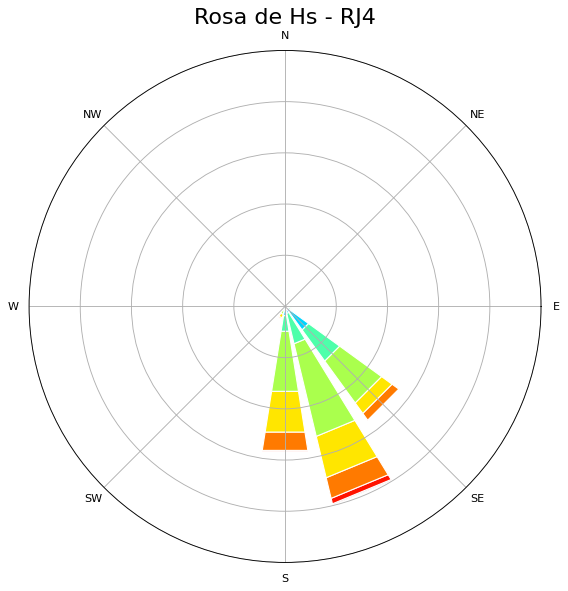

In [33]:
ws = compara_reanalise_limpo['TP']


ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
# ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
    
ax.set_title('Rosa de Hs - RJ4', fontsize=20)

# ax.set_yticklabels(y_ticks)
    
    
    
# ax.set_legend()

#plt.savefig(os.getcwd() +'/fig/RJ4_rosaTp_compara_reanalise')

In [34]:
dado['Hsig'].mean()

1.1666907972468519

In [35]:
moderate = (dado[dado['Hsig'].between(1.25,2.499)]['Hsig'] == True).count()
moderate_pc = 100*moderate/len(dado)
moderate_pc

33.31236407426712

In [36]:
rough = (dado[dado['Hsig'].between(2.5,4)]['Hsig'] == True).count()
rough_pc = 100*rough/len(dado)
rough_pc # descobre a quantidade da % de dados de onda "grossa"

1.2707370994122615